# I. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup
import lxml.etree as xml
import re
import json

# II. Add Sources of Data

### 1. Srap List of Moroccan cities for the web

In [2]:
headers = {
    'authority': 'scrapeme.live',
    'dnt': '1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'none',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
}

URL = "https://www.worlddata.info/africa/morocco/index.php" # class std100
URL = "https://simple.wikipedia.org/wiki/List_of_cities_in_Morocco"
# URL = "https://en.wikipedia.org/wiki/List_of_cities_in_Morocco"

def _extractData(URL):
    try:
        response = requests.get(URL, headers=headers)

        web_page = BeautifulSoup(response.text, 'html5lib')
        table = web_page.find_all(name="table", attrs={"class": "wikitable"})[0]

        df = pd.read_html(str(table))[0]
    except Exception as e:
        print(e)
        
    return df


cities = _extractData(URL)
cities.rename(columns={"Population(2004 census)[1]": "Population"}, inplace=True)
cities.drop(columns=["Rank", "Province", "Population"], inplace=True)
cities

,City,Region
0,Casablanca,Grand Casablanca
1,Fes,Fès-Boulemane
2,Salé,Rabat-Sale-Zemmour-Zaer
3,Marrakech,Marrakech-Tensift-El Haouz
4,Tangier,Tangier-Tetouan
...,...,...
340,Nzalat,Meknes-Tafilalet
341,Ahrara,Doukkala-Abda
342,Sidi Abdallah Ghiat,Marrakech-Tensift-El Haouz
343,Sidi Bouzid,Doukkala-Abda


### 2. Deleting small cities and villages

In [12]:
drop_cities = ['Ait Melloul', 'Wad Zam', 'Fkih BenSaleh', 'Taourirt', 'Kelaat Sraghna', 'Oulad Teima', 'Youssoufia', 'Sefrou', 'Tan-Tan', 'Guercif', 'Tiznit', 'Suq Sebt Oulad Nama', 'Azrou', 'Lahraouyine', 'Bensliman', 'Midelt', 'Jrada', 'Skhirat', 'Souk Larbaa', 'Aïn Harrouda', 'Bejaad', 'Kasbat Tadla', 'Sidi Bennour', 'Lqliaa', 'Boujdor', 'Azemour', "M'dyaq", 'Tinghir', 'El Arwi', "M'Rirt", 'El Aioun Sidi Mellouk', 'Lamkansa', 'Smara', 'Taounate', 'Bin Anşār', 'Sidi Yahya El Gharb', 'Zaio', 'Amalou Ighriben', 'Mechra Bel Ksiri', 'El Hajeb', 'Bouznika', 'Imzouren', 'Tahla', 'BouiZazarene Ihaddadene', 'Ain El Aouda', 'Bouarfa', 'Arfoud', 'Demnate', 'Sidi sliman echraa', 'Zawiyat cheikh', 'Ain Taoujdat', 'Echemaia', 'Aourir', 'Sabaa Aiyoun', 'Oulad Ayad', 'Ben Ahmed', 'Tabounte', 'Jorf El Melha', 'Missour', 'Laataouia', 'Errich', 'Zeghanghan', 'Rissani', 'Sidi Taibi', 'Sidi Ifni', 'Ait Ourir', 'Ahfir', 'El Ksiba', 'El Gara', 'Drargua', 'Imin tanout', 'Goulmima', 'Karia Ba Mohamed', 'Mehdya', 'El Borouj', 'Bouhdila', 'Chichaoua', 'Beni Bouayach', 'Oulad Berhil', 'Jmaat Shaim', 'Bir Jdid', 'Tata', 'Boujniba', 'Temsia', 'Mediouna', 'Kelat Megnouna', 'Sebt Gzoula', 'Outat El Haj', 'Imouzzer Kandar', 'Ain Bni Mathar', 'Bouskoura', 'Agourai', 'Midar', 'Lalla Mimouna', 'Ribat El Kheir', 'Moulay Driss zarhoun', 'Figuig', 'Boumia', 'Tamallalt', 'Nouaceur', 'Rommani', 'Jorf', 'Bouizakarn', 'Oulad Mbarek', 'Afourar', 'Zmamra', 'Ait Ishaq', 'Tit Mellil', 'Assa', 'Bhalil', 'Targuist', 'Beni Yakhlef', 'El Menzel', 'Aguelmouss', 'Sidi EL Mokhtar', 'Boumalne Dades', 'Farkhana', 'Oulad Abbou', 'Amizmiz', 'Boulanouare', 'Ben Taieb', 'Ouled Frej', 'Driouch', 'Deroua', 'Hattane', 'El Marsa', 'Tamanar', 'Ait Iaaza', 'Sidi Allal El Bahraoui', 'Dar Ould Zidouh', 'Sid Zouine', 'Boudnib', 'Foum Zguid', 'Tissa', 'Jaadar', 'Oulmes', 'Bouknadel', 'Harhoura', 'El Guerdan', 'Selouane', 'Maaziz', "Oulad M'Rah", 'Loudaya', 'Massa', 'Aklim', 'Ouaouizaght', 'Bni Drar', 'El Kbab', 'Oued Amlil', 'Sidi Rahel Chatai', 'Guigou', 'Agdz', 'Khnichet', 'Karia', 'Sidi Ahmed', 'Zag', 'Oulad Yaich', 'Tinjdad', 'Ouad Laou', 'Tighassaline', 'Tounfite', 'Bni Tadjite', 'Bouanane', 'Oulad Hriz Sahel', 'Talsint', 'Taghjijt', 'Boulman', 'Zirara', 'Taouima', 'Tahannaout', 'Bradia', 'Moulay Abdallah', 'Sidi Rahal', 'Tameslohte', 'Aghbala', 'El Ouatia', 'Tendrara', 'Taznakht', 'Fam El Hisn', 'Akka', 'Dar Gueddari', 'Itzer', 'Taliouine', 'Oualidia', 'Aoulouz', 'Moulay Bousselham', 'Tarfaya', 'Ghafsai', 'Foum Jemaa', 'Ain Leuh', 'Moulay Bouazza', 'Kariat Arkmane', 'Kahf Nsour', 'Sidi Bou Othmane', 'Oulad Tayeb', 'Had Kourt', 'Bab Berrad', 'Loulad', 'Zaida', 'Tafrawt', 'Khemis Sahel', 'Ait Baha', 'Biougra', 'Dar Bni Karrich', 'El Hanchane', 'Sidi Jaber', 'Irherm', 'Debdou', 'Ras El Ma', 'Laaounate', 'Hadj Kaddour', 'Skhour Rhamna', 'Bzou', 'Ain Cheggag', 'Bouderbala', 'Sidi Smaïl', 'Oulad Zbair', 'Bni Chiker', 'Lakhsas', 'Talmest', 'Aknoul', 'Tiztoutine', 'Bab Taza', 'Imouzzer Marmoucha', 'Gourrama', 'Ajdir', 'Mhaya', 'Oulad Ghadbane', 'Zrarda', 'Zoumi', 'Ain Karma', 'Thar Essouk', 'Lagouira', 'Ras El Ain', 'Sidi Ali Ben Hamdouche', 'Sebt Jahjouh', 'Tiddas', 'Zaouiat Bougrin', 'Tafersit', 'Touissit', 'Saidia', 'Lalla Takarkoust', 'Skhinate', 'Moulay Brahim', 'Soualem', 'Gueznaia', 'Moulay Yacoub', 'Sidi Allal Tazi', 'Laakarta', 'Alnif', 'Dar El Kebdani', 'Jebha', 'Ain Erreggada', 'Sidi Addi', 'Skoura', 'Smimou', 'Ain Jemaa', 'Timahdite', 'Aït Dawd', 'Souk EL Had', 'Had Bouhssoussen', 'Oulad Said', 'Arbaoua', 'Ain Dorij', 'Madagh', 'Tighza', 'Matmata', 'Kourouna', 'Kassita', 'Bni Hadifa', 'Oued EL Heimar', 'Kerrouchen', 'Tainaste', 'Guisser', 'Sidi Boubker', 'Tamassint', 'Assahrij', 'Aghbalou Nssardane', 'Tizi Ouasli', 'Moqrisset', 'Sebt Lamaarif', 'Issaguen', 'Bouguedra', 'Brikcha', 'Ighoud', 'Ajdir, Taza', 'Oulad Amrane', 'Kettara', 'Aoufous', 'Tafetacht', 'Naïma', 'Tnin Sidi Lyamani', 'Karia', 'Nzalat', 'Ahrara', 'Sidi Abdallah Ghiat', 'Sidi Bouzid', 'Ounagha']

# Get indexes of unwanted cities
cities[cities['City'].isin(drop_cities)].index

# Drop unwanted cities
cities.drop(cities[cities['City'].isin(drop_cities)].index, inplace=True)

### 3. Correcting names of some Cities

In [13]:
cities['City'][18] = "El Jadida"
cities['City'][48] = "Al Hoceima"
cities['City'][36] = "Tiflet"
cities['City'][71] = "Chefchaouen"
cities['City'][23] = "Ksar El-Kebir"
cities['City'][148] = "Ifrane"
cities['City'][32] = "Sidi Slimane"

# III. Visualize These Cities On Folium Map

### 1. Get cities latitude and longitude values from Geopy

In [14]:
from geopy.geocoders import Nominatim
import folium

address = cities["City"].tolist()
list_cities = []

for adr in address:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(str(adr)+", MA")
        latitude = location.latitude
        longitude = location.longitude
    #     print('The geograpical coordinate of ',adr,' are {}, {}.'.format(latitude, longitude))
        list_cities.append([adr, latitude, longitude])
        
    except Exception as e:
        print(str(adr),"not found")
    
dataframe = pd.DataFrame(list_cities, columns = ['City', 
                  'Latitude', 
                  'Longitude'])

Inzegan not found


### 2. Correcting Lat/Long of some Cities

In [15]:
pd.set_option('mode.chained_assignment', None)

# Safi
dataframe['Latitude'][11] = 32.291799
dataframe['Longitude'][11] = -9.238848

# Nador
dataframe['Latitude'][19] = 35.165139
dataframe['Longitude'][19] = -2.922922

### 3. Mark Cities on Folium Map

In [16]:
# create map of New York using latitude and longitude values
f = folium.Figure(width=1000, height=500)
morocco_map = folium.Map(location=[dataframe['Latitude'][0], dataframe['Longitude'][0]], zoom_start=6).add_to(f)

# add markers to map
for lat, lng, city in zip(dataframe['Latitude'], dataframe['Longitude'], dataframe['City']):
    label = city
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.5,
        parse_html=False).add_to(morocco_map)  
    
morocco_map

### Since Github doesn't support Folium, here's a screenshot

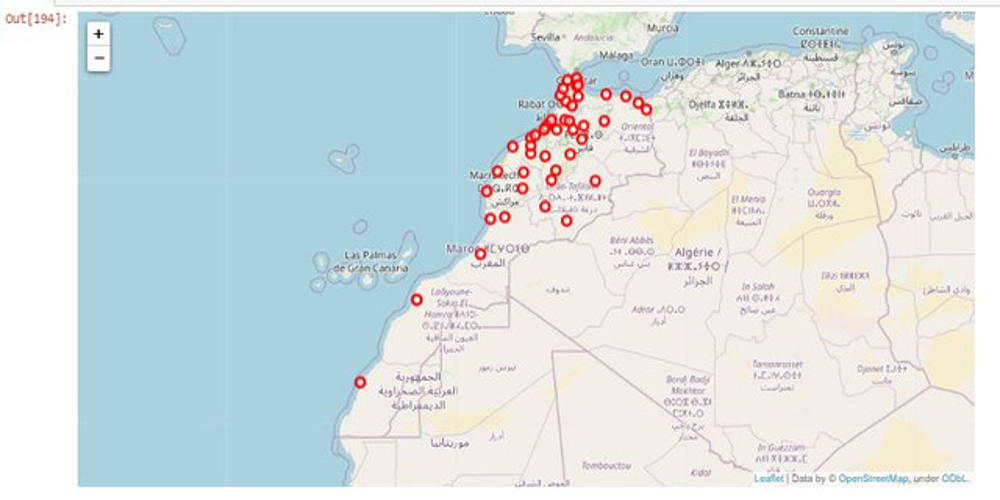

In [17]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://i.ibb.co/s6Cjmcj/morocco.jpg')
img = Image.open(BytesIO(response.content))
img.resize((1000,500))

# IV. Analyzing Each City

### 1. Initialize Foursquare Credentials

In [18]:
CLIENT_ID = 'K11QLHP35WUZC4RTZHMVWMLCFLGP4ILK1H4NPHEZB4OIEWLF' # your Foursquare ID
CLIENT_SECRET = '3MEIEWHMOACYUXQKFX5Y0UI51JLOYNHG2XM24LZZU342EIIU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: K11QLHP35WUZC4RTZHMVWMLCFLGP4ILK1H4NPHEZB4OIEWLF
CLIENT_SECRET:3MEIEWHMOACYUXQKFX5Y0UI51JLOYNHG2XM24LZZU342EIIU


### 2. Call API and fetch the results

**Send Request to Foursquare's API and fetch the results of each city into a separate JSON file** <br>
**This Request will return a Json file containing all the venues around the radius set previously** <br><br>
We save the results of each city in a seperate Json file to avoid calling the API over and over again

In [ ]:
# RUN ONLY IF CHANGES ARE REQUIRED

radius = 5000 # Radius in meters

for city in dataframe.values.tolist():
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION,
        city[1], 
        city[2], 
        radius, 
        LIMIT)

    with open(str(city[0])+'.json', 'w') as outfile:
        json.dump(requests.get(url).json(), outfile)

### 3. Open each file and retrieve venues data into Python list

In [22]:
cities_venues_list = []

for city in dataframe["City"].values.tolist():
    with open(str(city)+'.json') as json_file:
        results = json.load(json_file)
        res = results["response"]["groups"][0]["items"]

        venues_list = []

        for v in res:
            try :
                venues_list.append([
                    city,
                    v['venue']['name'],
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],  
                    v['venue']['categories'][0]['name']])
            except Exception as e:
                print(e)
        
        cities_venues_list.append(venues_list)

print("Exemple of Venue :", cities_venues_list[0][0])

Exemple of Venue : ['Casablanca', 'La Bodega', 33.59521995445795, -7.611576341960397, 'Pub']


### 4. Extract Venues for each City and make it into a Dataframe

In [25]:
nearby_venues = pd.DataFrame([item for a in cities_venues_list for item in a])
nearby_venues.columns = ['City',
                         'Venue',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

nearby_venues

,City,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Casablanca,La Bodega,33.595220,-7.611576,Pub
1,Casablanca,Sofitel Casablanca Tour Blanche,33.597748,-7.614201,Hotel
2,Casablanca,Casa Jose,33.597823,-7.615341,Tapas Restaurant
3,Casablanca,Brasserie la Bavaroise,33.595220,-7.611531,French Restaurant
4,Casablanca,La Sqala: Café Maure,33.602983,-7.619430,Moroccan Restaurant
...,...,...,...,...,...
1233,Ifrane,Restaurant Beethoven Ifrane,33.528862,-5.109837,American Restaurant
1234,Ifrane,Chamonix Hotel Ifrane,33.528523,-5.106232,Hotel
1235,Ifrane,Versailles Palace,33.525808,-5.111286,Moroccan Restaurant
1236,Ifrane,Restaurant Diafa,33.526310,-5.115713,Restaurant


### 5. Merge the original dataframe with the one containing the list of venues <br>

**(If the original dataframe contains other feature like population, size,...)**

In [26]:
cities_merged = dataframe.join(nearby_venues.set_index('City'), on='City')
cities_merged

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Casablanca,33.595063,-7.618777,La Bodega,33.595220,-7.611576,Pub
0,Casablanca,33.595063,-7.618777,Sofitel Casablanca Tour Blanche,33.597748,-7.614201,Hotel
0,Casablanca,33.595063,-7.618777,Casa Jose,33.597823,-7.615341,Tapas Restaurant
0,Casablanca,33.595063,-7.618777,Brasserie la Bavaroise,33.595220,-7.611531,French Restaurant
0,Casablanca,33.595063,-7.618777,La Sqala: Café Maure,33.602983,-7.619430,Moroccan Restaurant
...,...,...,...,...,...,...,...
45,Ifrane,33.527605,-5.107408,Restaurant Beethoven Ifrane,33.528862,-5.109837,American Restaurant
45,Ifrane,33.527605,-5.107408,Chamonix Hotel Ifrane,33.528523,-5.106232,Hotel
45,Ifrane,33.527605,-5.107408,Versailles Palace,33.525808,-5.111286,Moroccan Restaurant
45,Ifrane,33.527605,-5.107408,Restaurant Diafa,33.526310,-5.115713,Restaurant


# V. Clustering

**Choose the Features (Type of Venues) to Keep/Drop** <br>
**Here I deleted the venues that are repeated 9 times and less**

In [28]:
print(cities_merged["Venue Category"].value_counts().to_dict())

In [60]:
my_value_count = cities_merged["Venue Category"].value_counts()
venues_to_drop = []

for key in my_value_count.loc[my_value_count < 10].to_dict().keys():
    venues_to_drop.append(key)

In [61]:
drop = int(input("Drop venues ? (1/0): "))
cities_onehot = pd.get_dummies(cities_merged[['Venue Category']], prefix="", prefix_sep="")
if drop == 1:
    cities_onehot.drop(columns=venues_to_drop, inplace=True)

    # Type Yes if you want to delete some venues 

Drop venues ? (1/0): 0


### Convert the Categorical data on 'Venue Category' to Numerical using pandas' get_dummies <br>

In [62]:
cities_onehot["City"] = cities_merged["City"]
neigh = cities_onehot.pop('City')
cities_onehot.insert(0, 'City', neigh)

# cities_onehot["Population"] = cities_merged["Population"]
# neigh = cities_onehot.pop('Population')
# cities_onehot.insert(1, 'Population', neigh)

cities_onehot.dropna(inplace=True)
cities_onehot

,City,African Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Theme Park,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint,Yoga Studio,Zoo
0,Casablanca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Casablanca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Casablanca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Casablanca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Casablanca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Ifrane,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,Ifrane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,Ifrane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,Ifrane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Drop Rows w/ Nan values, group the dataframe by City and calculate the frequency of appearance of each type of venue**

In [63]:
cities_grouped = cities_onehot.groupby('City').mean().reset_index()
cities_grouped.dropna(inplace=True)
cities_grouped

,City,African Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Theme Park,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint,Yoga Studio,Zoo
0,Agadir,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.010638
1,Al Hoceima,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
2,Assilah,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
3,Azilal,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
4,Ben Guerir,0.000000,0.000000,0.250000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
5,Beni Mellal,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
6,Berkane,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
7,Berrechid,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
8,Casablanca,0.000000,0.000000,0.000000,0.00,0.010000,0.00,0.00,0.01,0.000000,...,0.000000,0.000000,0.000000,0.02,0.010000,0.000000,0.00,0.000000,0.01,0.000000
9,Chefchaouen,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000


**Scale the values of 'Population' between 0 and 1 If Used** (NOT USED)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# cities_grouped['Population_scaled'] = scaler.fit_transform(cities_grouped['Population'].values.reshape(-1,1))
# cities_grouped.drop(columns=["Population"],inplace=True)
# cities_grouped

## 1. Initializing KMeans

In [47]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import pickle

In [64]:
K = range(1,10)
distortions = []
preds = []
models = []
data = cities_grouped.drop(columns=["City"])

for k in K:
#     print("Tryin with",k,"Clusters...")
    model = KMeans(n_clusters=k, random_state=0).fit(data)
    models.append(model)
    distortions.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
    preds.append(model.labels_)

### 1.1 Evaluate with Elbow Method

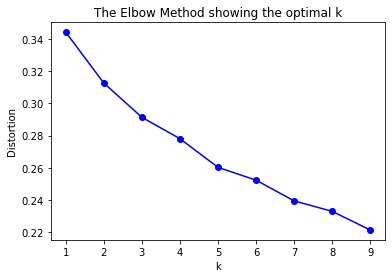

In [66]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**K = 3, 4 Looks like the optimal solution here**<br><br>
**Sometimes it might be hard to find the optimal K as the plot is note clear, like this case, it's either 3 or 4 <br>
So we use a different metric**

### 1.2 Evaluate with Silhouette Score

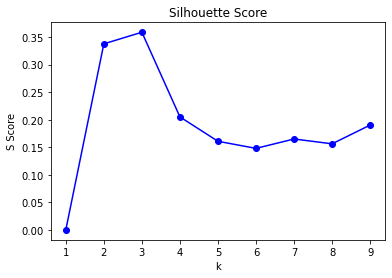

In [51]:
s_score = []

for k, pred in zip(K[1:], preds[1:]):
    s_score.append( metrics.silhouette_score(data, pred, metric='euclidean') )

s_score.insert(0, 0)
    
plt.plot(K, s_score, 'bo-')
plt.xlabel('k')
plt.ylabel('S Score')
plt.title('Silhouette Score')
plt.show()

**In the Silhouette Score, we take the 'K' that represents the peak of the plot, in this case 4**

## 2. Save/Load the Model

In [ ]:
optimal_K = int(input("Enter Number of Optimal K : "))

# Save
pickle.dump(models[int(optimal_K)-1], open("kMeans_city_final.pkl", "wb"))

# Load
model = pickle.load(open("kMeans_city_final.pkl", "rb"))
print("Loaded & Saved !")

### 2.1 Add Cluster Labels to the dataframe

In [ ]:
if 'Cluster Labels' in cities_grouped:
    cities_grouped["Cluster Labels"] = model.labels_
else : cities_grouped.insert(1, "Cluster Labels", model.labels_)

In [ ]:
cities_grouped

In [ ]:
moroccan_cities_clustered = data_morocco
moroccan_cities_clustered = moroccan_cities_clustered.join(cities_grouped.set_index('City'), on='City')
moroccan_cities_clustered

# VI. Visualize Clusters on the Map
**Using the previsou dataframe, we plot each city and assign each label to a color for a better visualization**

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
f = folium.Figure(width=1000, height=500)
morocco_clustered = folium.Map(location=[dataframe['Latitude'][0], dataframe['Longitude'][0]], zoom_start=6).add_to(f)

# set color scheme for the clusters
K = moroccan_cities_clustered["Cluster Labels"].max()+1
x = np.arange(K)
ys = [i + x + (i*x)**2 for i in range(K)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# rainbow = ["#ff0000", "#00ff00", "#0000ff", "#000000"]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(moroccan_cities_clustered['Latitude'], moroccan_cities_clustered['Longitude'], moroccan_cities_clustered['City'], moroccan_cities_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(morocco_clustered)
       
morocco_clustered

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://i.ibb.co/YyYHk85/morocco2.jpg')
img2 = Image.open(BytesIO(response.content))
img2.resize((1000,500))

In [ ]:
ur_city = input("Enter your city : ")

clustered_cities = []

for k in range(0, max(model.labels_)+1):
    cluster = moroccan_cities_clustered.loc[moroccan_cities_clustered['Cluster Labels'] == k, moroccan_cities_clustered.columns[[0] + list(range(5, moroccan_cities_clustered.shape[1]))]]
    clustered_cities.append(cluster["City"].values.tolist())
    
for cluster in clustered_cities:
    if ur_city in cluster:
        print("Those are the cities you may like : \n")
        display(pd.DataFrame(cluster, columns=["Suggested Cities"]))